# CIFAR-10 Classification by LeNet 5

Import Libraries

In [1]:
import os
import keras
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras.layers import Dense,Flatten,Dropout
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D,MaxPooling2D
%matplotlib inline

Using TensorFlow backend.


Define Functions.
Read Datasets In

In [2]:
#Load File Function
def load_file(fileName):
    data = open(fileName, 'rb')
    cifar = pickle.load(data, encoding='bytes')
    return cifar

#Load Batch Files
def get_Batch(fileName):
    imageDict = load_file(fileName)
    data = imageDict[b'data']
    label = imageDict[b'labels']
    #Reshap Images
    data = data.reshape(10000,3,32,32)
    data = data.transpose(0,2,3,1).astype("float")
    label = np.array(label)
    return data,label

#Get All DataSets
def get_DataSet(rootPath):
    trainX = []
    trainY = []
    for i in range(1,6):
        fileName = os.path.join(rootPath, 'data_batch_%d' % (i, ))
        data, label = get_Batch(fileName)
        trainX.append(data)
        trainY.append(label)
    #Combine 6 Training Sets
    trainData = np.concatenate(trainX)
    trainLabel = np.concatenate(trainY)
    #Do the Image Normalization
    return trainData/255, trainLabel

#Get Test Sets
def get_TestSet(rootPath):
    testX = []
    testY = []
    fileName = os.path.join(rootPath, 'test_batch')
    data, label = get_Batch(fileName)
    testX.append(data)
    testY.append(label)  
    testData = np.concatenate(testX)
    testLabel = np.concatenate(testY)
    #Do the Image Normalization
    return testData/255, testLabel

#Plot Accuracy Method
def plot_Accuracy(history,rate,batch,epoch):
    trainAcc = history.history['accuracy']
    testAcc = history.history['val_accuracy']
    fig1 = plt.figure()
    plt.plot(trainAcc)
    plt.plot(testAcc)
    plt.title('LeNet-5 Test Accuracy r='+str(rate)+' b='+str(batch)+' e='+str(epoch))
    plt.ylabel('Accuracy')
    plt.xlabel('Number of Epoch')
    plt.legend(['Train','Test'], loc='upper right')
    plt.show()
    fig1.savefig('acc.png')

#Plot Loss Method
def plot_Loss(history,rate,batch,epoch):
    trainLoss = history.history['loss']
    testLoss = history.history['val_loss']
    fig2 = plt.figure()
    plt.plot(trainLoss)
    plt.plot(testLoss)
    plt.title('LeNet-5 Test Loss r='+str(rate)+' b='+str(batch)+' e='+str(epoch))
    plt.ylabel('Loss')
    plt.xlabel('Number of Epoch')
    plt.legend(['Train','Test'], loc='upper right')
    plt.show()
    fig2.savefig('loss.png')

Read Data

In [3]:
dataPath = './cifar-10-batches-py'
trainData, trainLabel = get_DataSet(dataPath)
testData, testLabel = get_TestSet(dataPath)
testLabel = to_categorical(testLabel)
trainLabel = to_categorical(trainLabel)

Define the Parameters

In [4]:
filterNum1 = 6
filterNum2 = 16
filterSize = (5,5)
poolingSize = (2,2)
learningRate = 0.0005
batchSize = 128
epochNum = 35
fcNum1 = 120
fcNum2 = 84
dropFactor1 = 0.33
dropFactor2 = 0.33

Lenet Contruction Function

In [5]:
def LeNet(trainData,trainLabel):
    lenet = keras.models.Sequential()
    lenet.add(Conv2D(filterNum1,filterSize,input_shape=trainData.shape[1:],activation='relu', 
                     kernel_initializer = 'random_uniform'))
    lenet.add(MaxPooling2D(poolingSize))
    lenet.add(Conv2D(filterNum2,filterSize,activation='relu',kernel_initializer = 'random_uniform'))
    lenet.add(MaxPooling2D(poolingSize))
    lenet.add(Flatten())
    lenet.add(Dense(fcNum1,activation='relu'))
    lenet.add(Dropout(dropFactor1))
    lenet.add(Dense(fcNum2,activation='relu'))
    lenet.add(Dropout(dropFactor2))
    lenet.add(Dense(10,activation='softmax'))
    #Print Parameters
    lenet.summary()
    #Compile Parameters
    adamOp = keras.optimizers.Adam(learning_rate=learningRate)
    lenet.compile(optimizer=adamOp,metrics=['accuracy'],loss='categorical_crossentropy')

    return lenet

Main Function

In [6]:
lenet5=LeNet(trainData, trainLabel)
history=lenet5.fit(x=trainData,y=trainLabel,batch_size=batchSize,epochs=epochNum,shuffle=True,
          validation_data=(testData, testLabel))

NameError: name 'models' is not defined

In [7]:
testLoss,testAcc=lenet5.evaluate(x=testData,y=testLabel)
print("loss:",testLoss,"acc:",testAcc)

10000/10000 [==============================] - 1s 76us/step
loss: 1.7496834272384643 acc: 0.3707999885082245


Plot Accuracy

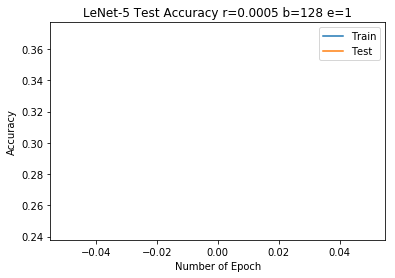

In [8]:
#Accuracy
plot_Accuracy(history,learningRate,batchSize,epochNum)

Plot Loss

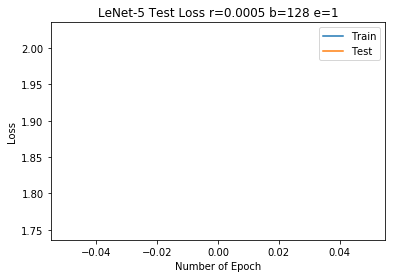

In [10]:
#Loss
plot_Loss(history,learningRate,batchSize,epochNum)